In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

# Data Import

In [5]:
ogDf = pd.read_csv("../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv")
ogDf.head()

,Unnamed: 0,Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,...,Major_category_Education,Major_category_Engineering,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science
0,0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,36,2057,282,0.120564,...,0,1,0,0,0,0,0,0,0,0
1,1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,7,679,77,0.101852,...,0,1,0,0,0,0,0,0,0,0
2,2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,3,725,131,0.153037,...,0,1,0,0,0,0,0,0,0,0
3,3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,16,1123,135,0.107313,...,0,1,0,0,0,0,0,0,0,0
4,4,5,2405,CHEMICAL ENGINEERING,Engineering,32260,289,21239,11021,0.341631,...,0,1,0,0,0,0,0,0,0,0


# Experiment 1
Apply k-means clustering using all numerical attributes available in the dataset. The objective is to get a baseline understanding of what a basic clustering of this data looks like and to identify any patterns in the data.

Use the Elblow Method and Silhouette Score to determine the optimal cluster size

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


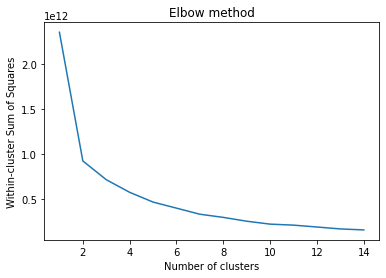

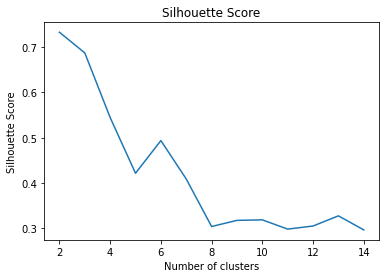

In [53]:
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
X = ogDf[cols].values

distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Choose 2 clusters since the rapid rate of change of the Elbow Method graph slows there and the Silhouette Score is best at this number of clusters

In [25]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

Create an Output Dataframe with the K-Means Classifications

<AxesSubplot:>

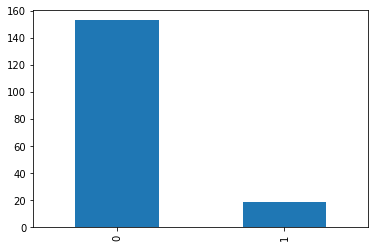

In [39]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']].copy()
outputDf['Clustering'] = kmeans.labels_
outputDf.Clustering.value_counts().plot.bar()

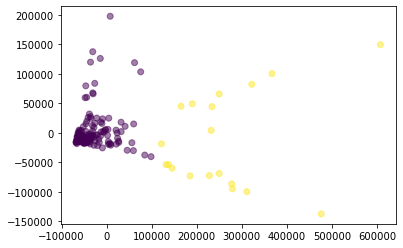

In [37]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1],c=outputDf['Clustering'], alpha=0.5)
plt.show()

In [40]:
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,86.830065,19872.339869,173.045752,14569.359477,17595.052288,0.522372,15724.352941,12875.483660,4732.084967,9591.692810,1203.320261,0.068079,40394.117647,29525.163399,51767.973856,7214.640523,6499.346405,1948.202614
1,1,89.052632,196601.210526,1848.526316,34073.421053,63388.736842,0.528874,157395.894737,133316.315789,42315.578947,102078.736842,12311.421053,0.072682,38205.263158,28757.894737,49894.736842,54104.000000,68622.000000,19449.210526


Inspect college major categories against K-Means Clustering features and clustering results

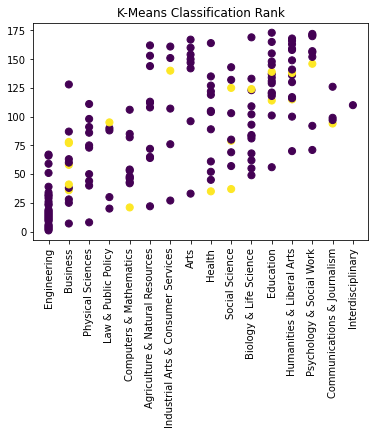

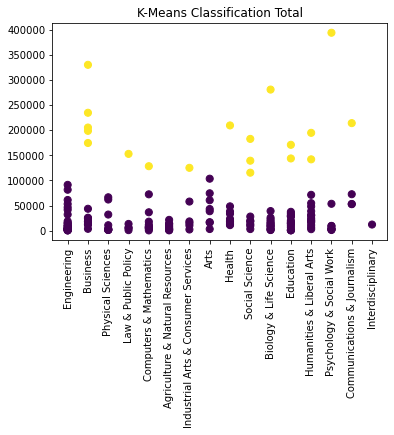

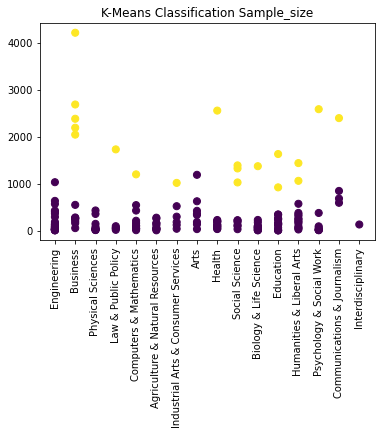

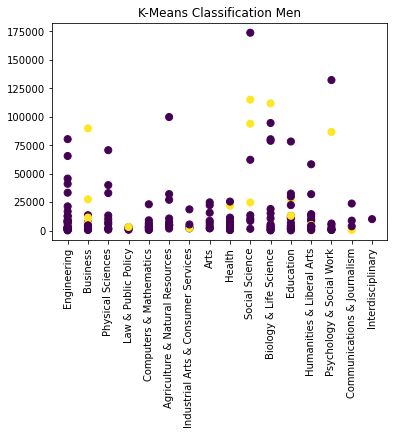

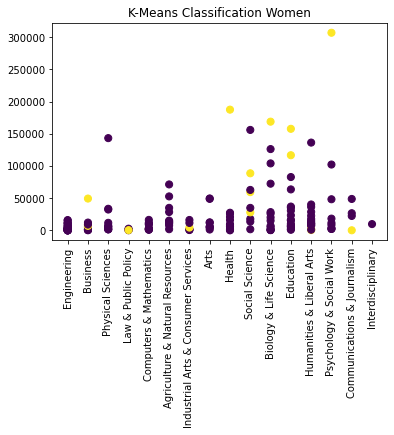

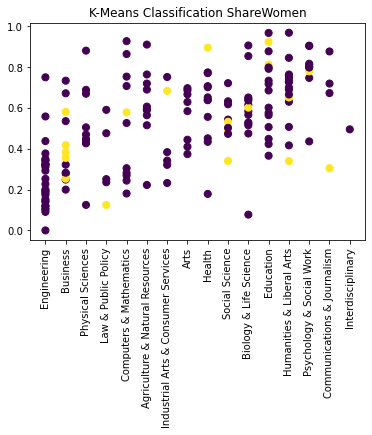

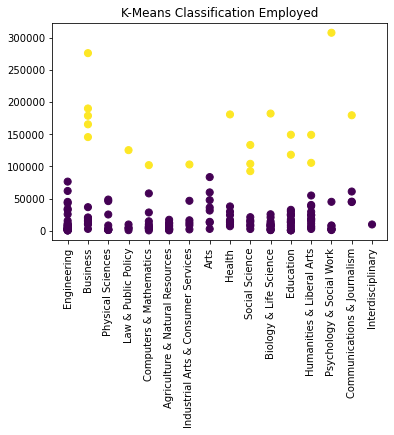

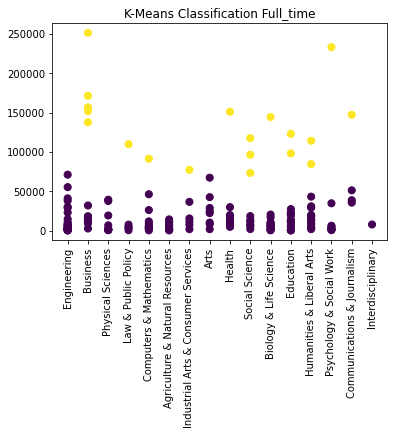

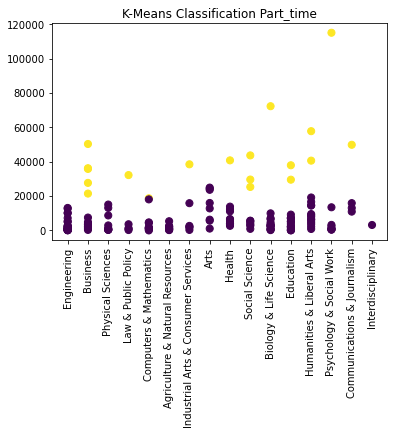

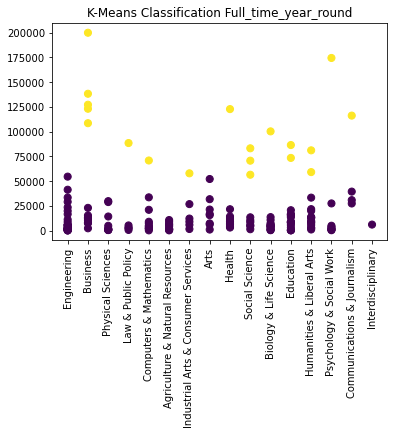

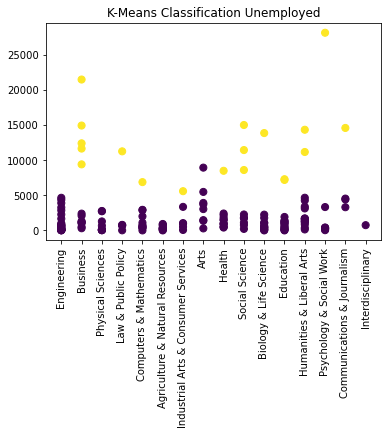

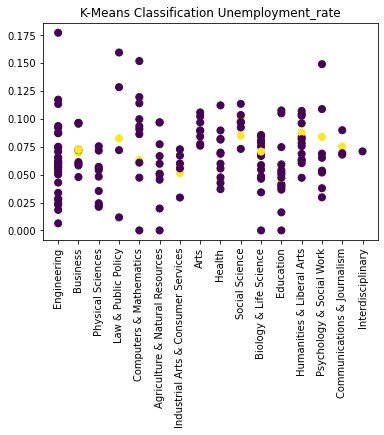

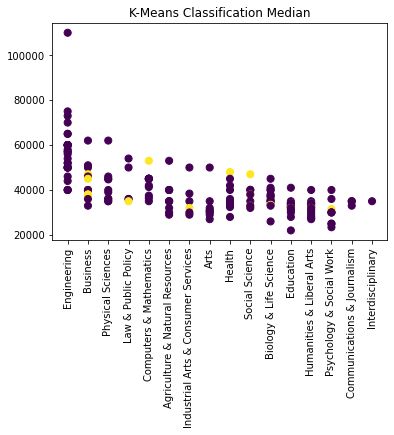

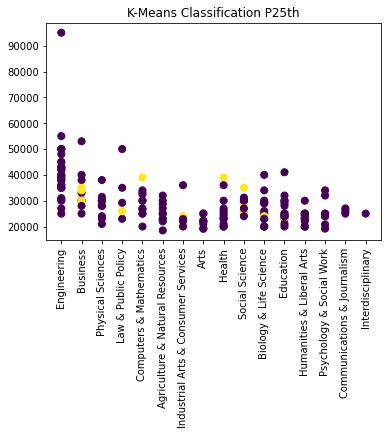

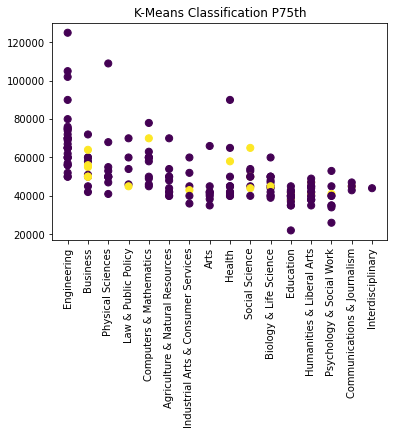

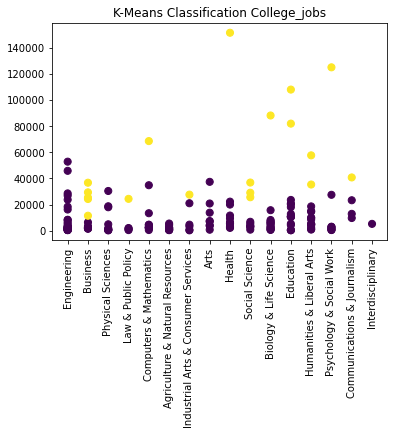

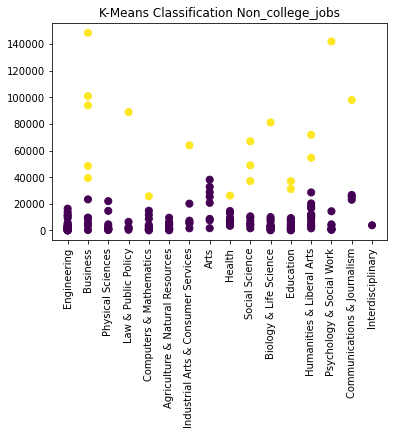

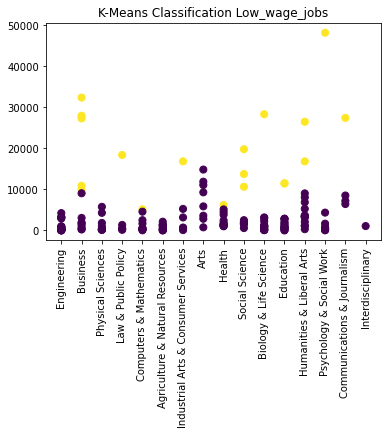

In [41]:
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
for x in cols:
    plt.figure()
    plt.scatter(x=outputDf.Major_category, y=outputDf[x],c=outputDf.Clustering, s=50)
    plt.xticks(rotation=90)
    plt.title('K-Means Classification ' + x)
    plt.plot()

No obvious clusters between Major Category against any of Rank, Men, Women, ShareWomen, Unemployment_rate, Median, P25th, or P75th.

Clusters with high values and small values seen when comparing Major Category against each of Total, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, College_jobs, Non_college_jobs, Low_wage_jobs

In [45]:
outputDf.loc[outputDf['Clustering'] == 1].sort_values(['Major_category',"Major"],ascending = [True,True])

,Major,Major_category,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,Clustering
122,BIOLOGY,Biology & Life Science,124,280709,1370,111762,168947,0.601858,182295,144512,...,100336,13874,0.070725,33400,24000,45000,88232,81109,28339,1
40,ACCOUNTING,Business,41,198633,2042,27392,9306,0.253583,165527,151967,...,123169,12411,0.069749,45000,34000,56000,11417,39323,10886,1
75,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,77,329927,4212,6383,8849,0.580948,276234,251540,...,199897,21502,0.072218,38000,29000,50000,36720,148395,32395,1
35,FINANCE,Business,36,174506,2189,89749,49498,0.355469,145696,137921,...,108595,9413,0.060686,47000,35000,64000,24243,48447,9910,1
57,GENERAL BUSINESS,Business,58,234590,2380,6053,4346,0.417925,190183,171385,...,138299,14946,0.072861,40000,30000,55000,29334,100831,27320,1
76,MARKETING AND MARKETING RESEARCH,Business,78,205211,2684,11404,7076,0.382900,178862,156668,...,127230,11663,0.061215,38000,30000,50000,25320,93889,27968,1
92,COMMUNICATIONS,Communications & Journalism,94,213996,2394,476,209,0.305109,179633,147335,...,116251,14602,0.075177,35000,27000,45000,40763,97964,27440,1
20,COMPUTER SCIENCE,Computers & Mathematics,21,128319,1196,1837,2524,0.578766,102087,91485,...,70932,6884,0.063173,53000,39000,70000,68622,25667,5144,1
137,ELEMENTARY EDUCATION,Education,139,170862,1629,13029,157833,0.923745,149339,123177,...,86540,7297,0.046586,32000,23400,38000,108085,36972,11502,1
112,GENERAL EDUCATION,Education,114,143718,919,26893,116825,0.812877,118241,98408,...,73531,7195,0.057360,34000,26000,41000,82007,31112,11443,1


# Experiment 2

In [46]:
from sklearn.preprocessing import StandardScaler

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


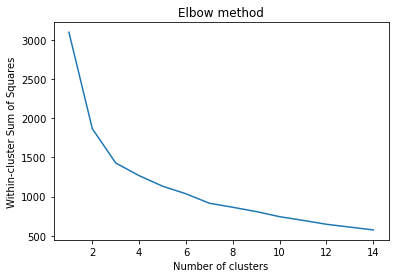

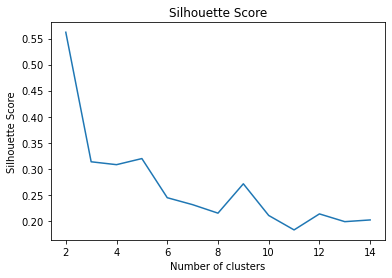

In [56]:
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
# Separating out the features
X = ogDf.loc[:, cols].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

<AxesSubplot:>

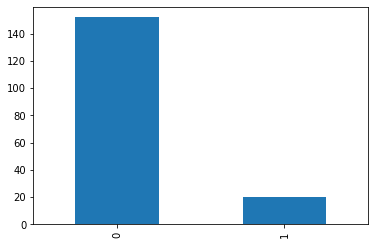

In [59]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']].copy()
outputDf['Clustering'] = kmeans.labels_
outputDf.Clustering.value_counts().plot.bar()

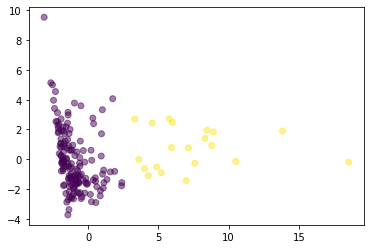

In [60]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1],c=outputDf['Clustering'], alpha=0.5)
plt.show()

In [61]:
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,86.769737,19322.289474,166.381579,14608.519737,17676.888158,0.523346,15278.572368,12516.453947,4602.776316,9311.092105,1152.375,0.067890,40429.605263,29554.934211,51812.5,7016.125,6291.322368,1863.394737
1,1,89.400000,191945.150000,1815.400000,32800.600000,60477.100000,0.521148,153700.250000,130022.900000,41419.150000,99586.950000,12143.200,0.073887,38045.000000,28570.000000,49650.0,53268.250,67096.850000,19218.700000


In [62]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)

<AxesSubplot:>

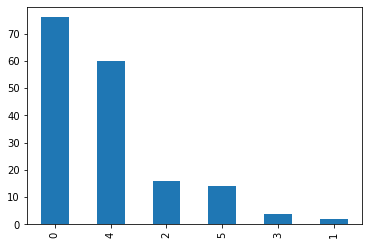

In [63]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']].copy()
outputDf['Clustering'] = kmeans.labels_
outputDf.Clustering.value_counts().plot.bar()

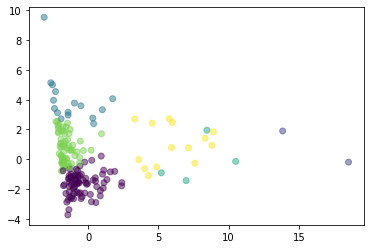

In [64]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1],c=outputDf['Clustering'], alpha=0.5)
plt.show()

In [65]:
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,0,130.184211,24609.013158,200.486842,16145.855263,27857.486842,0.683344,19486.986842,15239.184211,6696.157895,11178.697368,1508.815789,0.069170,32218.421053,24182.236842,41651.315789,8022.750000,9135.421053,2931.2500
1,1,111.500000,361831.000000,3398.000000,46515.500000,157968.000000,0.680441,292083.500000,242372.500000,82764.500000,187167.500000,24835.500000,0.078015,34750.000000,26500.000000,45500.000000,80934.000000,145127.500000,40301.0000
2,2,9.437500,25821.875000,234.937500,20265.000000,5556.875000,0.240022,20154.187500,18464.187500,3914.875000,14042.500000,1371.375000,0.070108,65318.750000,47468.750000,82500.000000,13817.625000,4210.625000,1069.8125
3,3,103.000000,201170.750000,1618.000000,43364.250000,157806.500000,0.808625,157694.500000,129322.000000,45178.000000,95806.000000,9215.750000,0.054883,36850.000000,28100.000000,45500.000000,107491.750000,43834.750000,14369.2500
4,4,52.400000,10892.550000,104.900000,11152.833333,8013.466667,0.396234,8647.750000,7481.600000,2134.600000,5683.750000,642.483333,0.065677,44193.333333,31583.333333,56500.000000,3927.333333,3243.650000,722.4000
5,5,82.357143,165039.857143,1645.714286,27823.142857,18741.428571,0.416256,132790.000000,114173.214286,34438.714286,88155.714286,11166.428571,0.078728,38857.142857,29000.000000,51428.571429,33823.571429,62595.928571,17592.5000


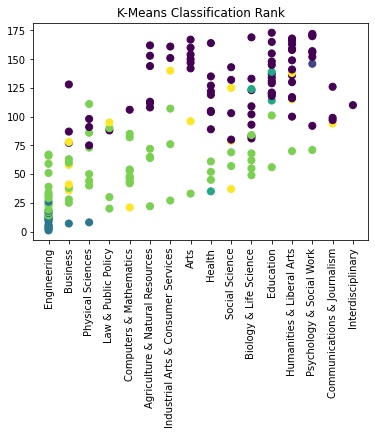

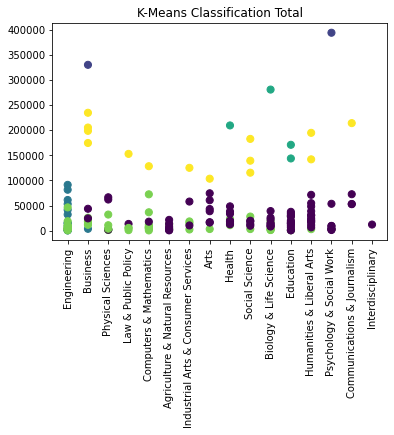

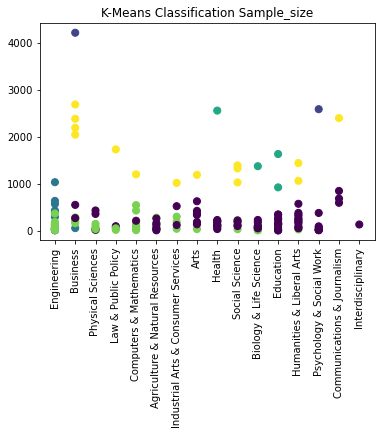

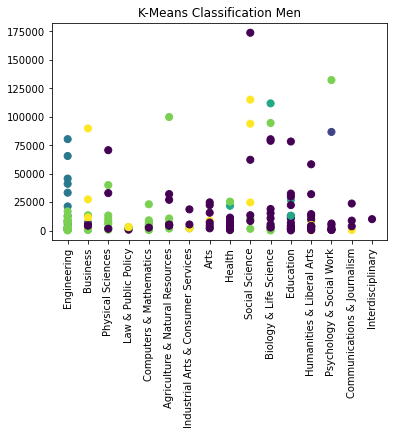

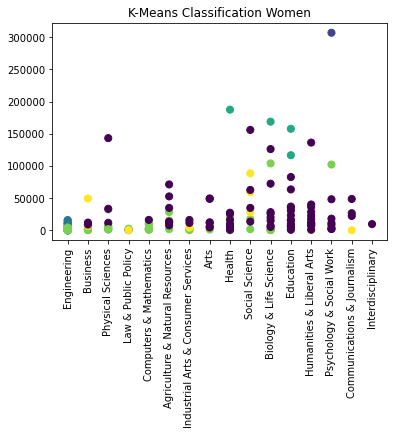

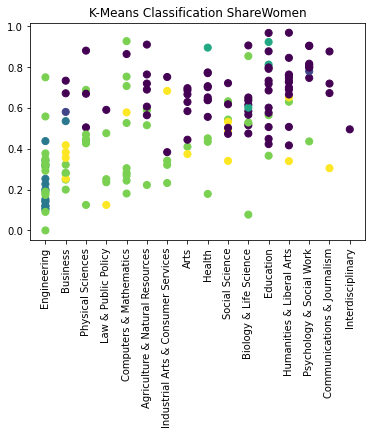

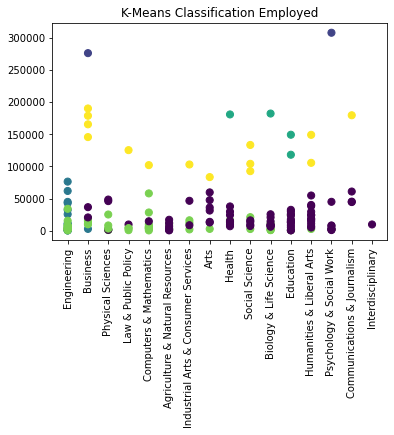

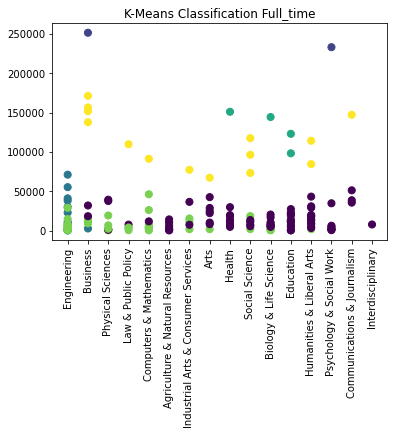

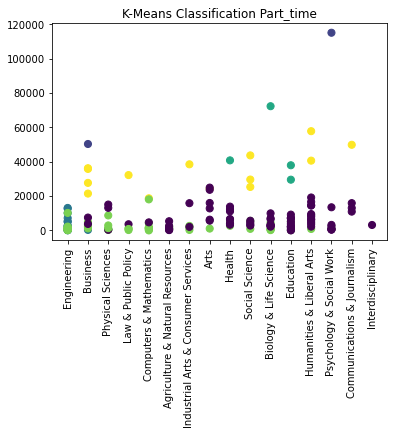

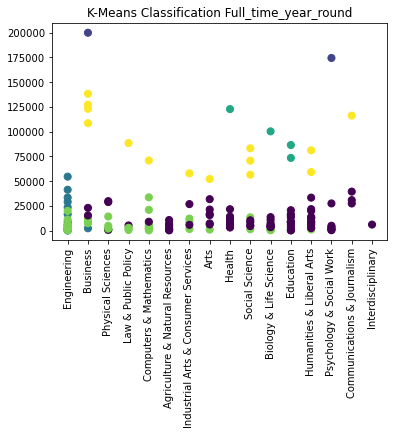

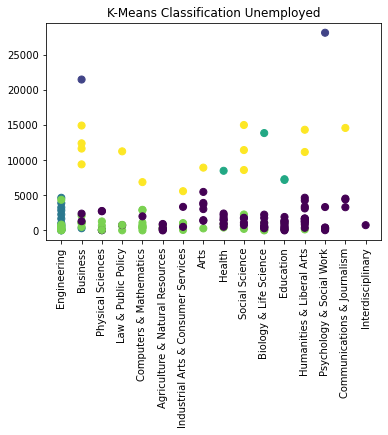

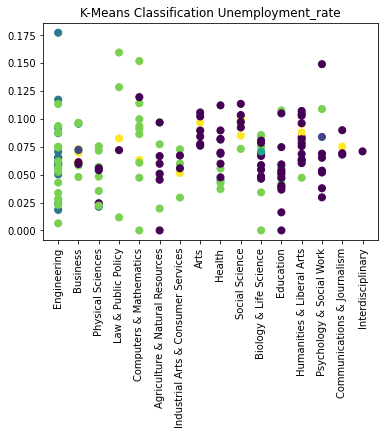

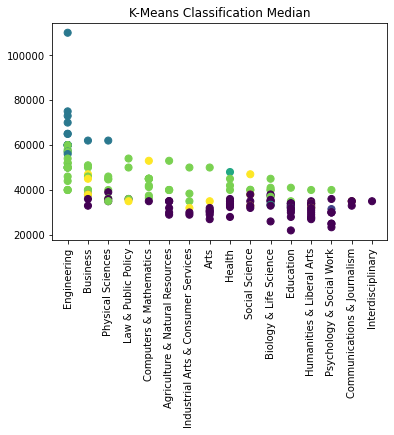

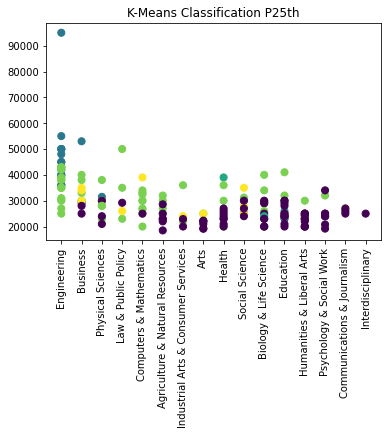

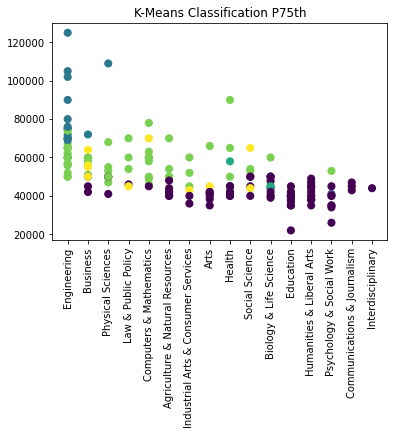

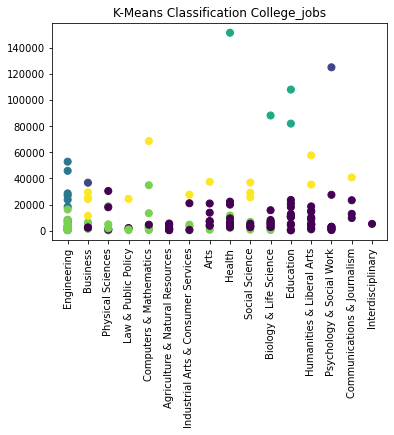

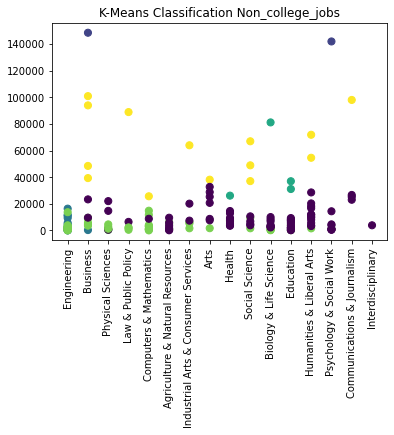

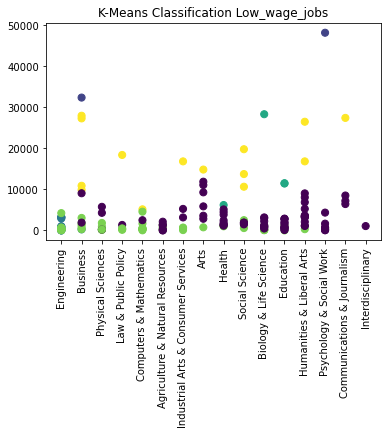

In [66]:
cols = ['Rank','Total','Sample_size','Men','Women','ShareWomen','Employed','Full_time','Part_time','Full_time_year_round','Unemployed','Unemployment_rate','Median','P25th','P75th','College_jobs','Non_college_jobs','Low_wage_jobs']
for x in cols:
    plt.figure()
    plt.scatter(x=outputDf.Major_category, y=outputDf[x],c=outputDf.Clustering, s=50)
    plt.xticks(rotation=90)
    plt.title('K-Means Classification ' + x)
    plt.plot()

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


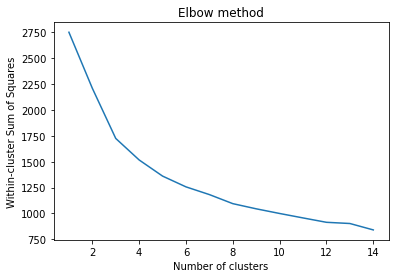

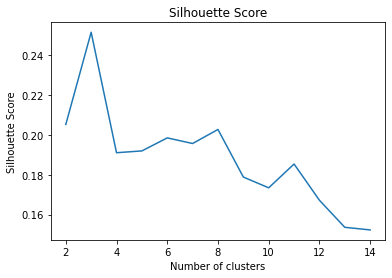

In [72]:
cols = ['Rank','Total','Percent_sample_size','Men','Women','ShareWomen','Percent_employed','Full_time','Part_time','Full_time_year_round','Percent_unemployed','Unemployment_rate','Median','P25th','P75th','Percent_college','Percent_non_college','Percent_low_wage']
# Separating out the features
X = ogDf.loc[:, cols].values
# Standardizing the features
X = StandardScaler().fit_transform(X)

distortions = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    distortions[k] = kmeans.inertia_

silouette = []
for k in range(2,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    silouette.append(silhouette_score(X,labels,metric='euclidean'))

plt.plot(list(distortions.keys()),list(distortions.values()))
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

plt.figure()
plt.plot(range(2,15),silouette)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [74]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

<AxesSubplot:>

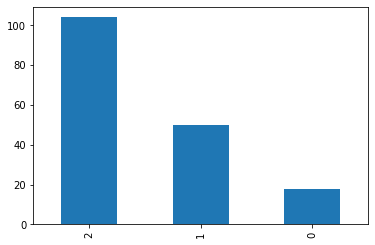

In [78]:
outputDf = ogDf[['Major','Major_category','Rank','Total','Percent_sample_size','Men','Women','ShareWomen','Percent_employed','Full_time','Part_time','Full_time_year_round','Percent_unemployed','Unemployment_rate','Median','P25th','P75th','Percent_college','Percent_non_college','Percent_low_wage']].copy()
outputDf['Clustering'] = kmeans.labels_
outputDf.Clustering.value_counts().plot.bar()

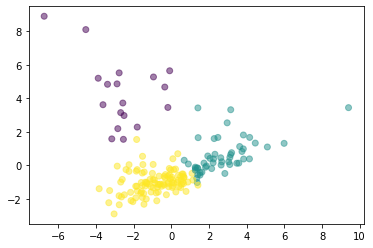

In [79]:
pca = PCA(n_components=2)
pca_feat = pca.fit_transform(X)
plt.scatter(x=pca_feat[:,0], y=pca_feat[:,1],c=outputDf['Clustering'], alpha=0.5)
plt.show()

In [80]:
avg_cluster = outputDf.groupby(by='Clustering').mean()
avg_cluster.reset_index(inplace=True)
avg_cluster

,Clustering,Rank,Total,Percent_sample_size,Men,Women,ShareWomen,Percent_employed,Full_time,Part_time,Full_time_year_round,Percent_unemployed,Unemployment_rate,Median,P25th,P75th,Percent_college,Percent_non_college,Percent_low_wage
0,0,92.833333,200394.666667,0.009432,35864.333333,66770.111111,0.526103,0.803130,135640.277778,43626.111111,103809.111111,0.063035,0.073210,37383.333333,28188.888889,48777.777778,0.270471,0.354438,0.100251
1,1,29.640000,18940.600000,0.008977,14787.680000,7275.820000,0.328362,0.784508,13293.040000,3169.720000,10160.380000,0.053752,0.063814,53342.000000,38956.000000,67360.000000,0.453640,0.223992,0.052597
2,2,113.692308,21363.048077,0.008856,14341.971154,22411.307692,0.616188,0.795638,13430.596154,5617.778846,9908.096154,0.059963,0.070082,34290.384615,25082.211538,44447.115385,0.320657,0.375977,0.106884


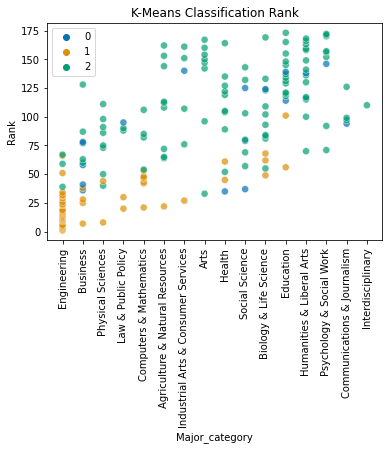

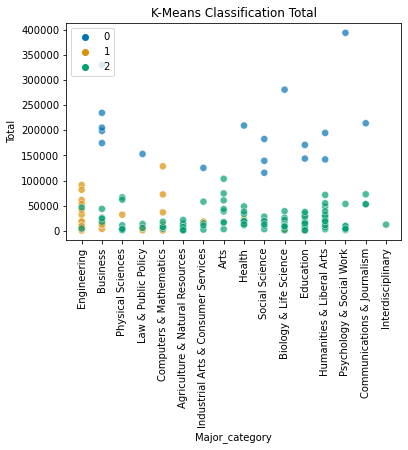

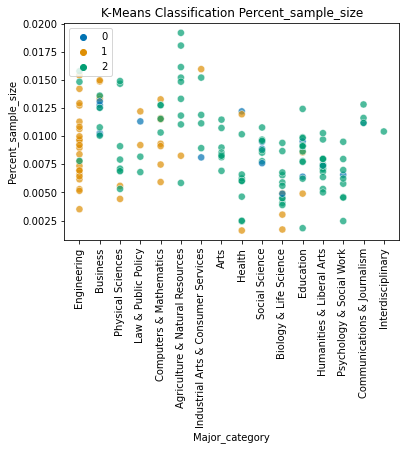

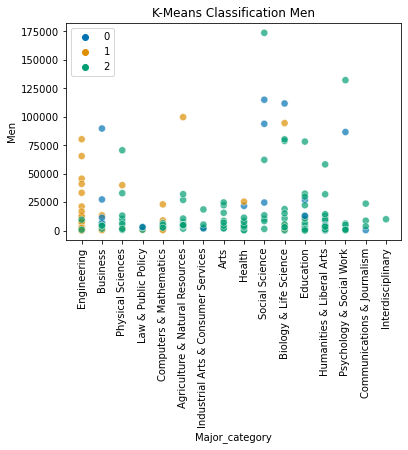

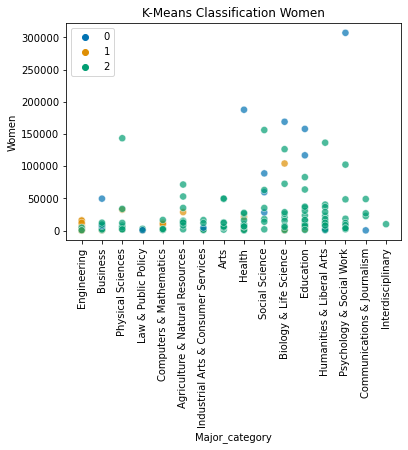

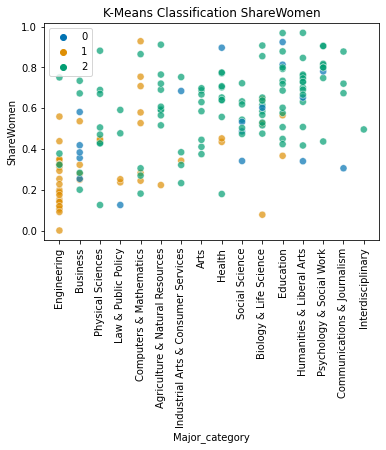

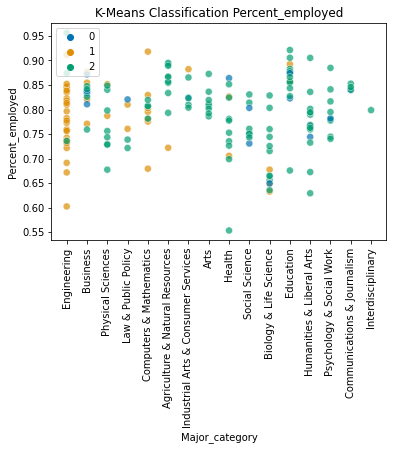

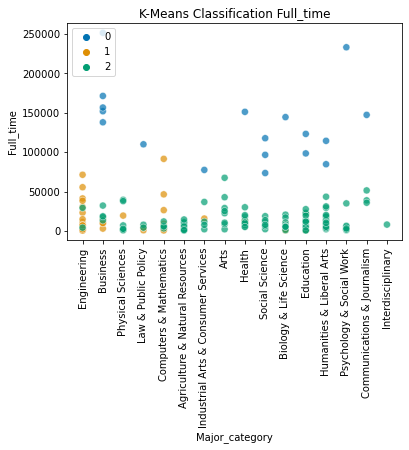

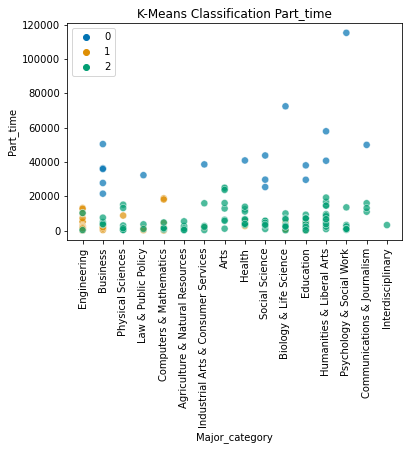

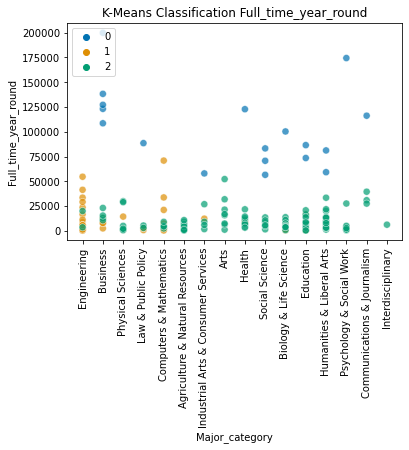

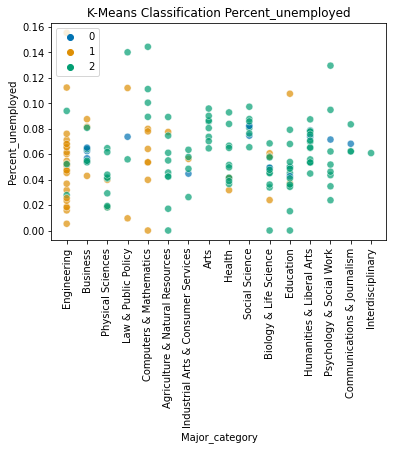

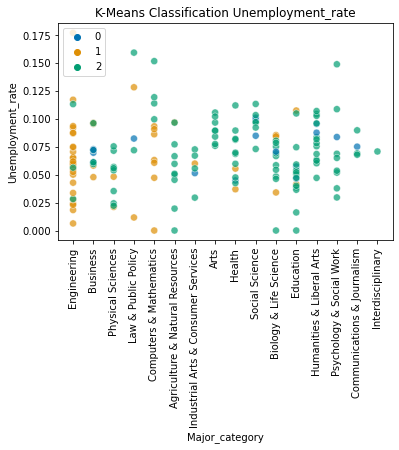

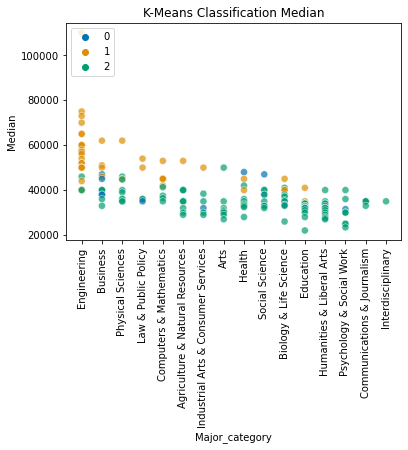

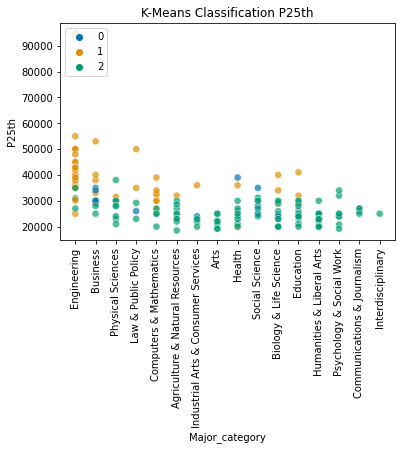

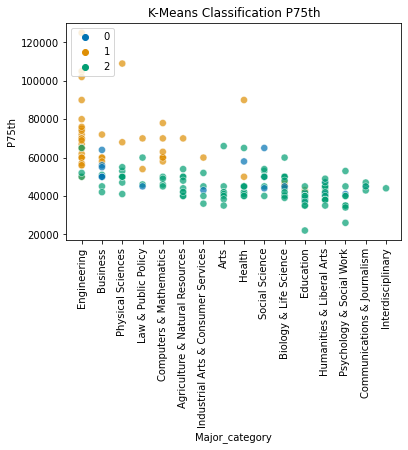

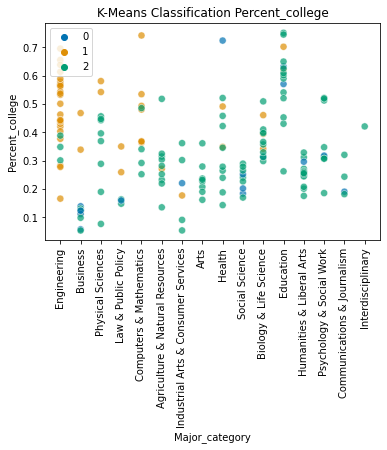

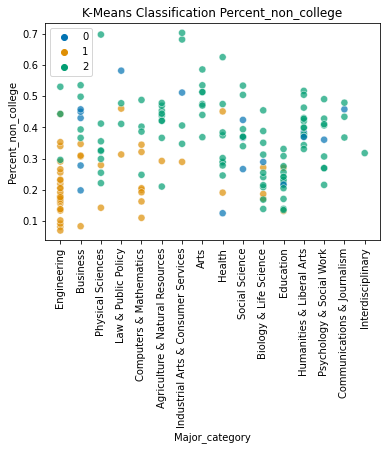

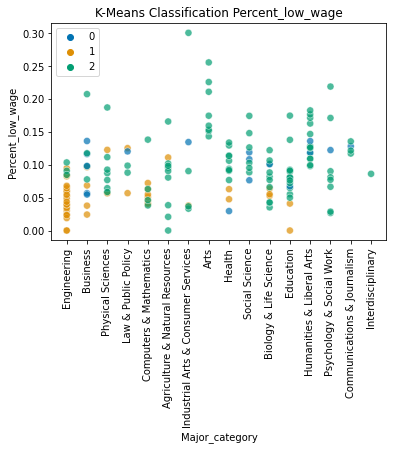

In [109]:
cols = ['Rank','Total','Percent_sample_size','Men','Women','ShareWomen','Percent_employed','Full_time','Part_time','Full_time_year_round','Percent_unemployed','Unemployment_rate','Median','P25th','P75th','Percent_college','Percent_non_college','Percent_low_wage']
for x in cols:
    plt.figure()
    sns.scatterplot(data= outputDf, x=outputDf.Major_category, y=outputDf[x],hue=outputDf.Clustering, s=50, palette='colorblind', alpha= 0.7)
    plt.legend(loc=2)
    plt.xticks(rotation=90)
    plt.title('K-Means Classification ' + x)
    plt.plot()

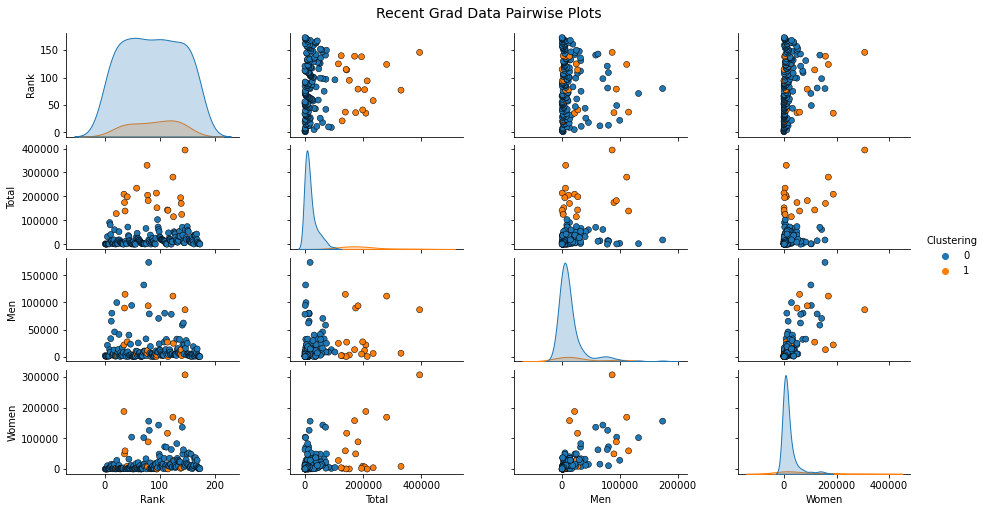

In [99]:
# Pairwise Plots for Clustering
cols = ['Rank','Total','Men','Women','Clustering']
pp = sns.pairplot(outputDf[cols], hue='Clustering', height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))

fig = pp.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Recent Grad Data Pairwise Plots', fontsize=14)